In [167]:
import sys
sys.path.append("..")

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from src.feature_importance import forestFit, LinearRegressionFit, impurityPlot, permutationPlot

## Read in Cohort of Significance(CoS)

In [168]:
df_cos=pd.read_csv("../data/cos_pca_dbscan_v2.csv")
df_cos = df_cos.drop(columns =["PC1","PC2"])

df_lab = pd.read_csv("../data/cohort_labels_v2.csv")
df_features = pd.read_csv("../data/cohort_features_v2.csv")

#label of cos
labels = pd.merge(left=df_cos, right=df_lab, on="ID")
labels = labels["sum_los"]

#features of cos
features = pd.merge(left=df_cos, right=df_features, on="ID")



In [169]:
mean_icuStay = labels.mean()
print("mean_icuStay", mean_icuStay)
y = labels > mean_icuStay

mean_icuStay 9.828420734585821


In [170]:
X = features.drop(columns=["ID"])
X.head()

,n_stays,anchor_age,suspected_infection,weight,height_chart,heart_rate_min,heart_rate_max,temperature_min,temperature_max,nbpm_min,...,dopamine,epinephrine,norepinephrine,phenylephrine,vasopressin,dobutamine,milrinone,albumin,bilirubin,abps
0,2,80,1,43.00,150.0,93.0,120.0,98.5,101.1,34.0,...,0,0,1,1,0,0,0,0,1,1
1,1,78,1,66.95,175.0,59.0,141.0,97.6,98.7,55.0,...,0,0,0,1,0,0,0,0,0,1
2,1,51,1,111.65,180.0,82.0,107.0,98.5,101.3,65.0,...,0,0,0,0,0,0,0,0,0,0
3,2,54,0,91.15,117.0,67.0,91.0,98.0,98.4,58.0,...,1,0,0,0,0,0,1,1,1,0
4,2,60,1,123.70,183.0,62.0,91.0,97.7,99.3,64.0,...,0,0,1,0,0,0,0,1,1,0


### Feature Importance Analysis using Random Forest

In [171]:
feature_names_RF, forest_RF, X_test_RF, y_test_RF = forestFit(X,y)

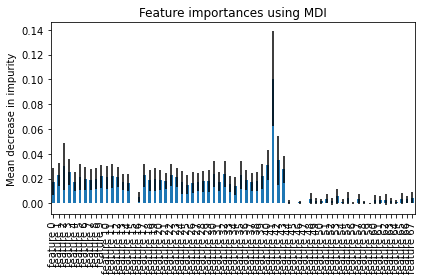

In [172]:
impurityPlot(feature_names_RF,forest_RF)

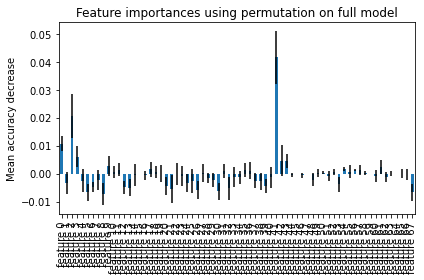

In [173]:
permutationPlot(feature_names_RF,forest_RF, X_test_RF, y_test_RF)

### Feature Importance Analysis using Linear Regression

In [174]:
feature_names_LR, forest_LR, X_test_LR, y_test_LR = LinearRegressionFit(X,y)